In [5]:
import numpy as np
import numpy.random as randn
import pymc as pm
import matplotlib.pyplot as plt

#enter variables of the test
#http://nbviewer.jupyter.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter6_Priorities/Ch6_Priors_PyMC3.ipynb
#http://stats.stackexchange.com/questions/92752/when-to-terminate-the-bayesian-a-b-test
#https://stats.stackexchange.com/questions/165/how-would-you-explain-markov-chain-monte-carlo-mcmc-to-a-layperson

visits_A = 7552
tours_A = 419
visits_B = 7326
tours_B = 386

data_A = np.r_[[0] * (visits_A - tours_A), [1] * tours_A]
data_B = np.r_[[0] * (visits_B - tours_B), [1] * tours_B]

# used uniform distribution e.g 1,1 and assumes no knowledge 
alpha = pm.Uniform('alpha', lower=0, upper=1)
beta = pm.Uniform('beta', lower=0, upper=1)


@pm.deterministic
def delta(alpha=alpha, beta=beta):
    return beta - alpha

obs_A = pm.Bernoulli ("obs_A",alpha, value = data_A, observed = True)
obs_B = pm.Bernoulli("obs_B", beta, value = data_B, observed = True)

mcmc = pm.MCMC([alpha, beta, delta, obs_A, obs_B])
mcmc.sample(500000, 1000)


 [-----------------100%-----------------] 500000 of 500000 complete in 167.5 sec

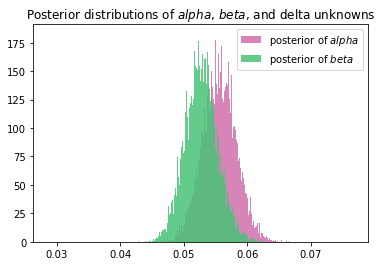

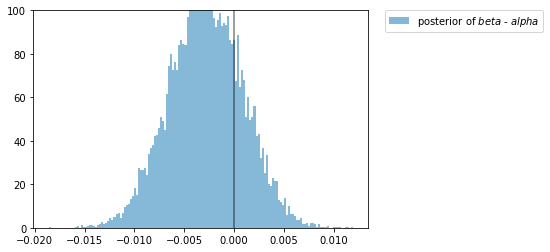

Probability Control is greater than Test: 0.78 
Probability Test is Greater than Control: 0.22
                        1 percent greater : 0.15
                        5 percent greater : 0.02
                       10 percent greater : 0.00


In [4]:
p_A_samples = mcmc.trace("alpha")[:]
p_B_samples = mcmc.trace("beta")[:]
delta_samples = mcmc.trace("delta")[:]

#plt.xlim(0.20, 1000,100)
plt.hist(p_A_samples, histtype='stepfilled', bins=150, alpha=0.85,
label="posterior of $alpha$", color="#d070ad", normed=True,
edgecolor= "none")
plt.legend(loc="upper right")
plt.title("Posterior distributions of $alpha$, $beta$, and delta unknowns")


xmin = (tours_B/visits_B)*0.5
xmax = (tours_B/visits_B)*1.5

plt.xlim(xmin, xmax,1000)
plt.hist(p_B_samples, histtype='stepfilled', bins=150, alpha=0.85,
        label="posterior of $beta$", color="#48c376", normed=True,
        edgecolor = "none")
plt.legend(loc="upper right")

plt.show()

# PLOT the blue Chart Alpah - Beta 

plt.ylim(0,100)
plt.hist(delta_samples, histtype='stepfilled', bins=150, alpha=0.85,
        label="posterior of $beta$ - $alpha$", color="#70ADD0",normed=True,
        edgecolor = "none")
plt.legend(loc="upper right")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.vlines(0, 0, 120, color="black", alpha = .5)

plt.show()

a = (delta_samples < 0.00).mean()
b = (delta_samples > 0.00).mean()

c = (delta_samples > 0.001).mean()
d = (delta_samples > 0.005).mean()
e = (delta_samples > 0.01).mean()


print("Probability Control is greater than Test: %0.2f " % a)

print("Probability Test is Greater than Control: %0.2f" % b)

print("                        1 percent greater : %0.2f" % c)

print("                        5 percent greater : %0.2f" % d)
print("                       10 percent greater : %0.2f" % e)

